In [4]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from PIL import Image

In [2]:
''''
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['Baroque','Byzantine','Egyptian','Gothic']

modelo='./modelo/model.h5'
weights='./modelo/parametros.h5'

modelt=load_model(modelo)
modelt.load_weights(weights)

def predict2(file_path, target_size=(64,64)):
    img=load_img(file_path)
    img = img.resize(target_size)
    xt = np.toarray(img)
    xt=preprocess_input(xt)
    xt = np.expand_dims(xt,axis=0)
    preds = modelt.predict(xt)
    result=preds[0]
    result = names[np.argmax(preds)]
    style=np.argmax(result)
    return result
predict2("download.jpg")
''''

SyntaxError: EOL while scanning string literal (<ipython-input-2-26760a567398>, line 25)

Gothic


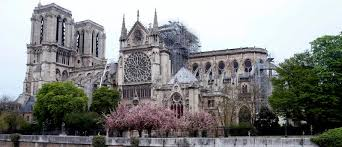

In [9]:
modelo='./modelo/model.h5'
weights='./modelo/weights.h5'

model=load_model(modelo)
model.load_weights(weights)
names = ['Baroque','Byzantine','Egyptian','Gothic']

def predict(file_path, target_size=(64,64)):
    
    img=load_img(file_path)
    img = img.resize(target_size)
    img=img_to_array(img)
    img=np.expand_dims(img, axis=0) 
    pred=model.predict(img) 
    result=pred
    style=names[np.argmax(result)]
    return style

print(predict("download.jpg"))
Image.open('download.jpg')

In [ ]:
preds = predict("download.jpg")
result = print(preds) 

In [ ]:
'''
from matplotlib import pyplot
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()
'''

In [ ]:
'''
for i,layer in enumerate(model.layers):
    if "conv" in layer.name:
        print(i,layer.name, layer.output.shape)
'''

In [ ]:
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

model_feat = Model(inputs=model.inputs, outputs=model.layers[0].output)

In [ ]:
file = 'download.jpg'

x=load_img(file, target_size=(64,64))
x=img_to_array(x) 
img=np.expand_dims(x, axis=0) 


feature_maps = model_feat.predict(img)
# plot all 64 maps in an 8x8 squares
square = 5
ix = 1
pyplot.figure(figsize=(12,12))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
# show the figure
pyplot.show()

In [ ]:
im = feature_maps[0,:,:,:3] 
pyplot.imshow(im/im.max())

In [ ]:
ixs = [0,2,4]
outputs = [model.layers[i].output for i in ixs]
model_feat = Model(inputs=model.inputs, outputs=outputs)

file = 'download.jpg'

x=load_img(file, target_size=(64,64))
x=img_to_array(x) 
img=np.expand_dims(x, axis=0) 

feature_maps = model_feat.predict(img)

pyplot.imshow(x/255)

# plot the output from each block
square = 5
for fmap in feature_maps:
    pyplot.figure(figsize=(10,10))
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()